In [1]:
#importing packages for project as per need 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#for linear regression 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#for decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

#Support Vector Machine

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
 

In [2]:
# importing data here and perform basic analysis 

In [3]:
data= pd.read_csv('GradePrediction.csv')
data.head()

,ID,Name,Age,Scholarship,Class,CGPA 1,CGPA 2,Health,Attendance,EXA,ClassRemark
0,48920,'Stephin K George',20,No,BCA,6.8,7.3,None,Regular,Sports,Good
1,49193,'Pawni Mishra',19,Yes,BCA,7.5,8.0,None,Private,Art,Excellent
2,48921,'Vikash Pandey ',21,No,BCA,6.4,7.5,None,Regular,Music,Good
3,49418,'Anubhav jha',21,No,BCA,5.8,6.4,Anxiety,Regular,Art,Average
4,50979,'Khalid fayaz',19,No,BCA,7.1,7.3,None,Regular,Sports,Good


In [4]:
data.shape

(461, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           461 non-null    int64  
 1   Name         461 non-null    object 
 2   Age          461 non-null    int64  
 3   Scholarship  461 non-null    object 
 4   Class        461 non-null    object 
 5   CGPA 1       461 non-null    float64
 6   CGPA 2       461 non-null    float64
 7   Health       461 non-null    object 
 8   Attendance   461 non-null    object 
 9   EXA          461 non-null    object 
 10  ClassRemark  461 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 39.7+ KB


In [6]:
data.index

RangeIndex(start=0, stop=461, step=1)

In [7]:
data.columns

Index(['ID', 'Name', 'Age', 'Scholarship', 'Class', 'CGPA 1', 'CGPA 2',
       'Health', 'Attendance', 'EXA', 'ClassRemark'],
      dtype='object')

In [8]:
data.nunique().to_frame()

,0
ID,411
Name,449
Age,7
Scholarship,2
Class,5
CGPA 1,39
CGPA 2,38
Health,4
Attendance,2
EXA,4


In [9]:
data['ID'].count()

461

In [13]:
#preprocessing 

In [14]:
data.duplicated().sum()

1

In [ ]:
data.drop_duplicates(inplace_True)

In [12]:
data.isna().sum()

ID             0
Name           0
Age            0
Scholarship    0
Class          0
CGPA 1         0
CGPA 2         0
Health         0
Attendance     0
EXA            0
ClassRemark    0
dtype: int64

In [13]:
#droping all the missing values 

In [14]:
data.dropna(inplace=True)

In [15]:
data.isna().sum()

ID             0
Name           0
Age            0
Scholarship    0
Class          0
CGPA 1         0
CGPA 2         0
Health         0
Attendance     0
EXA            0
ClassRemark    0
dtype: int64

In [16]:
data.head()

,ID,Name,Age,Scholarship,Class,CGPA 1,CGPA 2,Health,Attendance,EXA,ClassRemark
0,48920,'Stephin K George',20.0,No,BCA,6.8,7.3,None,Regular,Sports,Good
1,49193,'Pawni Mishra',19.0,Yes,BCA,7.5,8.0,None,Private,Art,Excellent
2,48921,'Vikash Pandey ',21.0,No,BCA,6.4,7.5,None,Regular,Music,Good
3,49418,'Anubhav jha',21.0,No,BCA,5.8,6.4,Anxiety,Regular,Art,Average
4,50979,'Khalid fayaz',19.0,No,BCA,7.1,7.3,None,Regular,Sports,Good


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           461 non-null    int64  
 1   Name         461 non-null    object 
 2   Age          461 non-null    float64
 3   Scholarship  461 non-null    object 
 4   Class        461 non-null    object 
 5   CGPA 1       461 non-null    float64
 6   CGPA 2       461 non-null    float64
 7   Health       461 non-null    object 
 8   Attendance   461 non-null    object 
 9   EXA          461 non-null    object 
 10  ClassRemark  461 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 39.7+ KB


In [18]:
data.nunique()

ID             411
Name           449
Age              8
Scholarship      2
Class            5
CGPA 1          39
CGPA 2          38
Health           4
Attendance       2
EXA              4
ClassRemark      3
dtype: int64

In [19]:
data['Age'].unique()

array([20.   , 19.   , 21.   , 22.   , 23.   , 24.   ,  0.   , 22.021])

In [20]:
data['ID'].value_counts().sum()

461

In [21]:
data.drop_duplicates(subset=['ID'],inplace=True)

In [22]:
data['ID'].count()

411

In [23]:
data['ID'].value_counts().sum()

411

In [24]:
#statistical Analysis 

In [25]:
data.describe() #to get central tandency of dataset 

,ID,Age,CGPA 1,CGPA 2
count,411.000000,411.000000,411.000000,411.000000
mean,44142.335766,20.858932,6.655474,6.804866
std,13746.619635,1.538025,0.898122,0.843151
min,0.000000,0.000000,0.000000,0.000000
25%,33030.500000,20.000000,6.100000,6.300000
50%,45437.000000,21.000000,6.500000,6.800000
75%,55312.000000,22.000000,7.100000,7.300000
max,66595.000000,24.000000,8.600000,9.200000


In [26]:
data.describe(include='object')

,Name,Scholarship,Class,Health,Attendance,EXA,ClassRemark
count,411,411,411,411,411,411,411
unique,401,2,5,4,2,4,3
top,'Stephin K George',No,B.COM,Stress,Regular,Dance,Good
freq,2,275,142,118,260,120,205


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 460
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           411 non-null    int64  
 1   Name         411 non-null    object 
 2   Age          411 non-null    float64
 3   Scholarship  411 non-null    object 
 4   Class        411 non-null    object 
 5   CGPA 1       411 non-null    float64
 6   CGPA 2       411 non-null    float64
 7   Health       411 non-null    object 
 8   Attendance   411 non-null    object 
 9   EXA          411 non-null    object 
 10  ClassRemark  411 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 38.5+ KB


In [28]:
data.describe(include='object')

,Name,Scholarship,Class,Health,Attendance,EXA,ClassRemark
count,411,411,411,411,411,411,411
unique,401,2,5,4,2,4,3
top,'Stephin K George',No,B.COM,Stress,Regular,Dance,Good
freq,2,275,142,118,260,120,205


In [29]:
correlation = data['CGPA 1'].corr(data['CGPA 2'])

In [30]:
correlation

0.4894432873411609

In [31]:
correlation1 = data['ID'].corr(data['CGPA 1'])

In [32]:
correlation1

0.0947391007728859

In [33]:
correlation2 = data['ID'].corr(data['CGPA 2'])
correlation2

0.04837437014428381

In [34]:
#Normalizing dataset ------> simple feature scaling method



In [35]:
data['CGPA 2']=data['CGPA 2']/data['CGPA 2'].max()

In [36]:
data['CGPA 1']=data['CGPA 1']/data['CGPA 1'].max()

In [37]:
data.head(3) #because the max value in both columns are same 

,ID,Name,Age,Scholarship,Class,CGPA 1,CGPA 2,Health,Attendance,EXA,ClassRemark
0,48920,'Stephin K George',20.0,No,BCA,0.790698,0.793478,None,Regular,Sports,Good
1,49193,'Pawni Mishra',19.0,Yes,BCA,0.872093,0.869565,None,Private,Art,Excellent
2,48921,'Vikash Pandey ',21.0,No,BCA,0.744186,0.815217,None,Regular,Music,Good


In [38]:
# EDA-----> Explorotry data analysis 

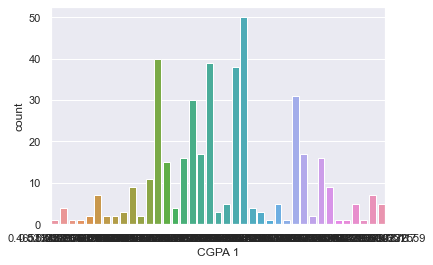

In [39]:
sns.countplot(x='CGPA 1',data=data)
plt.show()

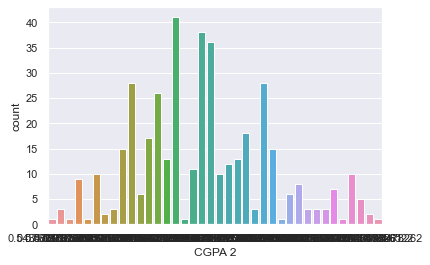

In [40]:
sns.countplot(x='CGPA 2',data=data)
plt.show()

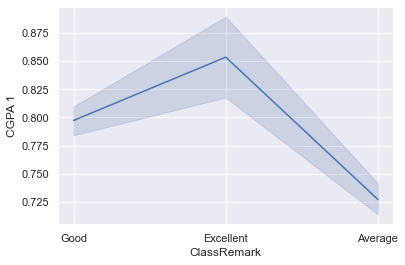

In [41]:
sns.lineplot(x='ClassRemark',y='CGPA 1',data=data)
plt.show()

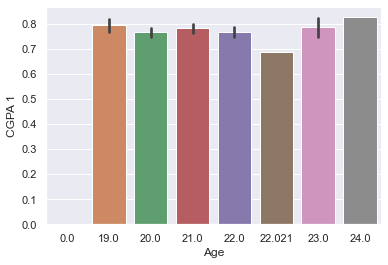

In [42]:
sns.barplot(x='Age',y='CGPA 1',data=data)
plt.show()

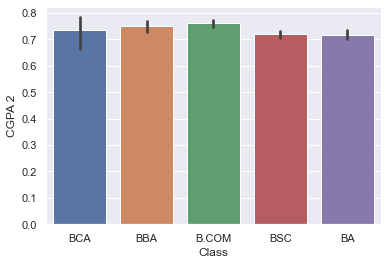

In [43]:
sns.barplot(x='Class',y='CGPA 2',data=data)
plt.show()

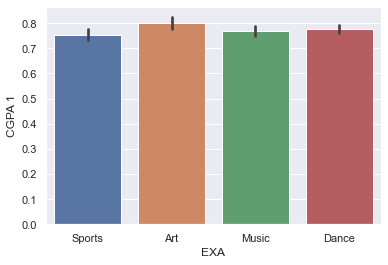

In [44]:
sns.barplot(x='EXA',y='CGPA 1',data=data)
plt.show()

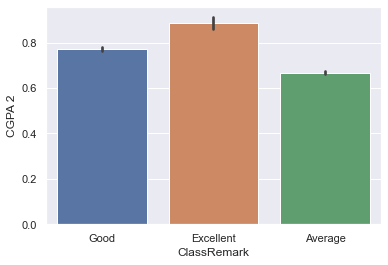

In [45]:
sns.barplot(x='ClassRemark',y='CGPA 2',data=data)
plt.show()

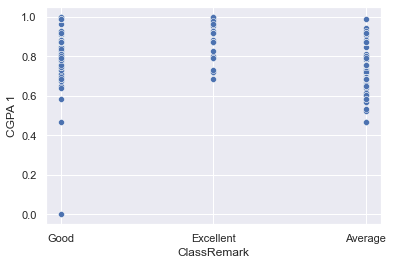

In [46]:
sns.scatterplot(x='ClassRemark',y='CGPA 1',data=data)
plt.show()

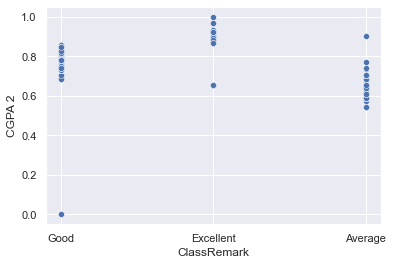

In [47]:
sns.scatterplot(x='ClassRemark',y='CGPA 2',data=data)
plt.show()

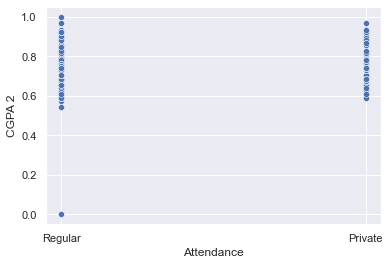

In [48]:
sns.scatterplot(x='Attendance',y='CGPA 2',data=data)
plt.show()

<AxesSubplot:xlabel='CGPA 1', ylabel='Count'>

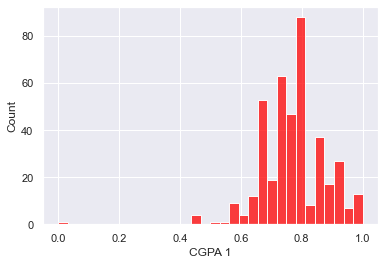

In [49]:
sns.histplot(data['CGPA 1'],color='red')

<AxesSubplot:xlabel='CGPA 1'>

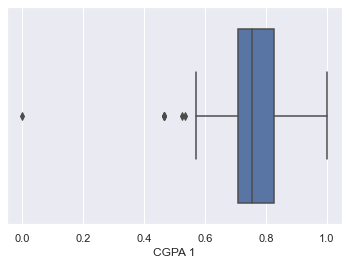

In [50]:
sns.boxplot(x='CGPA 1',data=data)

<AxesSubplot:xlabel='CGPA 2'>

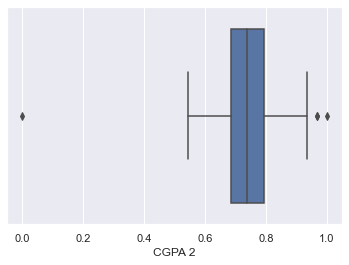

In [51]:
sns.boxplot(x='CGPA 2',data=data)

<AxesSubplot:xlabel='CGPA 1', ylabel='ClassRemark'>

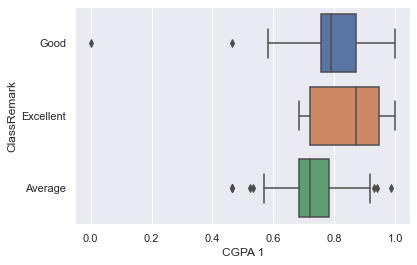

In [52]:
sns.boxplot(y='ClassRemark',x='CGPA 1',data=data)

<AxesSubplot:xlabel='CGPA 2', ylabel='ClassRemark'>

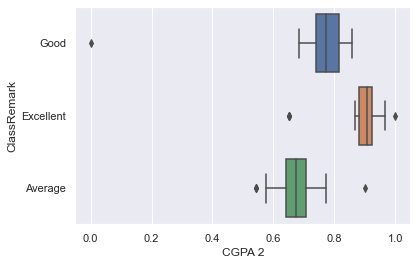

In [53]:
sns.boxplot(y='ClassRemark',x='CGPA 2',data=data)

In [54]:
data.head(3)

,ID,Name,Age,Scholarship,Class,CGPA 1,CGPA 2,Health,Attendance,EXA,ClassRemark
0,48920,'Stephin K George',20.0,No,BCA,0.790698,0.793478,None,Regular,Sports,Good
1,49193,'Pawni Mishra',19.0,Yes,BCA,0.872093,0.869565,None,Private,Art,Excellent
2,48921,'Vikash Pandey ',21.0,No,BCA,0.744186,0.815217,None,Regular,Music,Good


In [55]:
# spliting testing and training data 

In [56]:
X = data[['CGPA 1','CGPA 2']]
y = data[['CGPA 1','CGPA 2']]

In [57]:
X.head(3)

,CGPA 1,CGPA 2
0,0.790698,0.793478
1,0.872093,0.869565
2,0.744186,0.815217


In [58]:
y.head(3)

,CGPA 1,CGPA 2
0,0.790698,0.793478
1,0.872093,0.869565
2,0.744186,0.815217


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [60]:
X_train.head()

,CGPA 1,CGPA 2
217,0.790698,0.695652
244,0.930233,0.815217
348,0.755814,0.739130
42,0.790698,0.760870
338,0.883721,0.706522


In [61]:
y_train.head()

,CGPA 1,CGPA 2
217,0.790698,0.695652
244,0.930233,0.815217
348,0.755814,0.739130
42,0.790698,0.760870
338,0.883721,0.706522


In [62]:
len(X_train)

246

In [63]:
len(X_test)

165

In [64]:
#model building Linear Regression ------------------->

In [65]:
model = LinearRegression()

In [66]:
model.fit(X_train, y_train)

LinearRegression()

In [67]:
prediction = model.predict(X_test)
prediction

array([[0.80232558, 0.7826087 ],
       [0.6744186 , 0.68478261],
       [0.76744186, 0.73913043],
       [0.87209302, 0.73913043],
       [0.73255814, 0.65217391],
       [0.68604651, 0.67391304],
       [0.87209302, 0.72826087],
       [0.63953488, 0.61956522],
       [0.75581395, 0.68478261],
       [0.98837209, 0.73913043],
       [0.73255814, 0.75      ],
       [0.68604651, 0.70652174],
       [0.72093023, 0.68478261],
       [0.58139535, 0.69565217],
       [0.75581395, 0.70652174],
       [0.87209302, 0.81521739],
       [0.79069767, 0.7826087 ],
       [0.73255814, 0.75      ],
       [0.79069767, 0.7826087 ],
       [0.65116279, 0.68478261],
       [0.6744186 , 0.65217391],
       [0.75581395, 0.73913043],
       [0.88372093, 0.81521739],
       [0.80232558, 0.77173913],
       [0.79069767, 0.82608696],
       [0.80232558, 0.79347826],
       [0.74418605, 0.73913043],
       [0.74418605, 0.80434783],
       [0.80232558, 0.77173913],
       [0.8372093 , 0.75      ],
       [0.

In [68]:
y_test

,CGPA 1,CGPA 2
67,0.802326,0.782609
130,0.674419,0.684783
330,0.767442,0.739130
451,0.872093,0.739130
134,0.732558,0.652174
...,...,...
349,0.790698,0.684783
129,0.790698,0.750000
227,0.674419,0.706522
180,0.802326,0.750000


In [69]:
model.score(X_test,y_test) #to check Accuracy of the model 

1.0

In [70]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-1.11022302e-16  1.11022302e-16]
Coefficients: [[ 1.00000000e+00 -1.30113655e-16]
 [ 0.00000000e+00  1.00000000e+00]]


In [71]:
data.head(2)

,ID,Name,Age,Scholarship,Class,CGPA 1,CGPA 2,Health,Attendance,EXA,ClassRemark
0,48920,'Stephin K George',20.0,No,BCA,0.790698,0.793478,None,Regular,Sports,Good
1,49193,'Pawni Mishra',19.0,Yes,BCA,0.872093,0.869565,None,Private,Art,Excellent


In [72]:
#Decision Tree------------------------------->


In [94]:
X = data.drop('ClassRemark', axis=1)  # Features
y = data['ClassRemark']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


In [74]:
y

0           Good
1      Excellent
2           Good
3        Average
4           Good
         ...    
456         Good
457         Good
458         Good
459    Excellent
460         Good
Name: ClassRemark, Length: 411, dtype: object

In [75]:
data.dtypes

ID               int64
Name            object
Age            float64
Scholarship     object
Class           object
CGPA 1         float64
CGPA 2         float64
Health          object
Attendance      object
EXA             object
ClassRemark     object
dtype: object

In [76]:
data.head(3)

,ID,Name,Age,Scholarship,Class,CGPA 1,CGPA 2,Health,Attendance,EXA,ClassRemark
0,48920,'Stephin K George',20.0,No,BCA,0.790698,0.793478,None,Regular,Sports,Good
1,49193,'Pawni Mishra',19.0,Yes,BCA,0.872093,0.869565,None,Private,Art,Excellent
2,48921,'Vikash Pandey ',21.0,No,BCA,0.744186,0.815217,None,Regular,Music,Good


In [85]:
#data.drop(columns=['EXA'],inplace=True)

In [86]:
#data.drop(columns=['Class'],inplace=True)

In [87]:
#data.drop(columns=['Name'],inplace=True)

In [88]:
#data.drop(columns=['Scholarship'],inplace=True)

In [89]:
#data.drop(columns=['Health'],inplace=True)

In [91]:
#data.drop(columns=['Attendance'],inplace=True)

In [95]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [96]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [97]:
predictions = model.predict(X_test)
predictions

array(['Average', 'Average', 'Good', 'Good', 'Good', 'Average', 'Good',
       'Average', 'Average', 'Good', 'Average', 'Average', 'Excellent',
       'Average', 'Good', 'Good', 'Good', 'Average', 'Average', 'Good',
       'Good', 'Good', 'Average', 'Average', 'Average', 'Average',
       'Excellent', 'Excellent', 'Average', 'Average', 'Good', 'Good',
       'Average', 'Excellent', 'Excellent', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Average', 'Average', 'Excellent',
       'Good', 'Average', 'Excellent', 'Good', 'Good', 'Good', 'Average',
       'Average', 'Average', 'Good', 'Average', 'Average', 'Average',
       'Good', 'Good', 'Average', 'Average', 'Average', 'Average', 'Good',
       'Good', 'Good', 'Average', 'Average', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Average', 'Average', 'Good', 'Good',
       'Average', 'Good', 'Average', 'Average', 'Average', 'Good',
       'Average', 'Good', 'Good', 'Average', 'Average', 'Excellent',
       'Goo

In [98]:
print("Accuracy:", accuracy_score(y_test, predictions))   #to get accuracy 
print("\nClassification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.9696969696969697

Classification Report:
               precision    recall  f1-score   support

     Average       0.96      0.97      0.96        70
   Excellent       1.00      0.94      0.97        17
        Good       0.97      0.97      0.97        78

    accuracy                           0.97       165
   macro avg       0.98      0.96      0.97       165
weighted avg       0.97      0.97      0.97       165



In [99]:
from sklearn import tree
model=tree.DecisionTreeClassifier(random_state=0)
model=model.fit(X_train, y_train)


[Text(0.47368421052631576, 0.9285714285714286, 'X[3] <= 0.723\ngini = 0.567\nsamples = 246\nvalue = [98, 21, 127]'),
 Text(0.21052631578947367, 0.7857142857142857, 'X[2] <= 0.948\ngini = 0.16\nsamples = 105\nvalue = [96, 3, 6]'),
 Text(0.10526315789473684, 0.6428571428571429, 'X[0] <= 10682.5\ngini = 0.059\nsamples = 98\nvalue = [95, 0, 3]'),
 Text(0.05263157894736842, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.15789473684210525, 0.5, 'X[2] <= 0.895\ngini = 0.04\nsamples = 97\nvalue = [95, 0, 2]'),
 Text(0.10526315789473684, 0.35714285714285715, 'gini = 0.0\nsamples = 89\nvalue = [89, 0, 0]'),
 Text(0.21052631578947367, 0.35714285714285715, 'X[3] <= 0.69\ngini = 0.375\nsamples = 8\nvalue = [6, 0, 2]'),
 Text(0.15789473684210525, 0.21428571428571427, 'X[1] <= 20.5\ngini = 0.5\nsamples = 4\nvalue = [2, 0, 2]'),
 Text(0.10526315789473684, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.21052631578947367, 0.07142857142857142, 'gini = 0.0\nsample

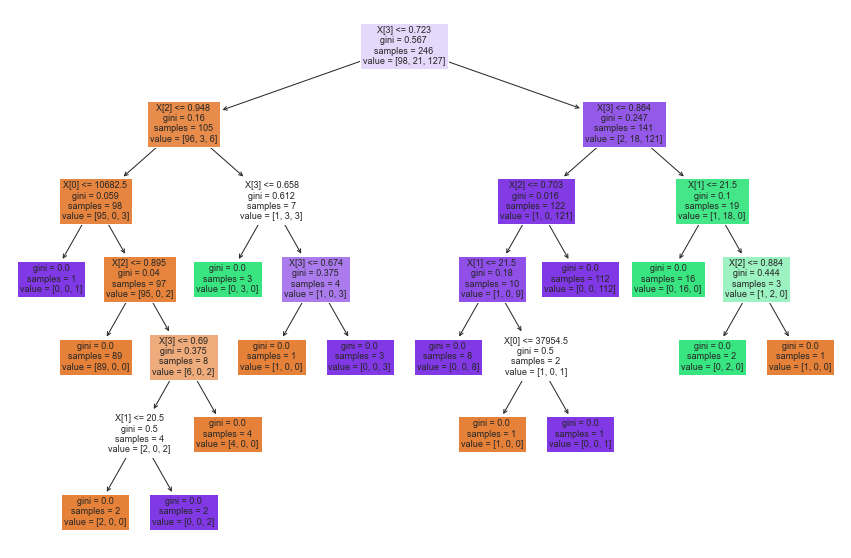

In [100]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [101]:
print(tree.export_text(model))

|--- feature_3 <= 0.72
|   |--- feature_2 <= 0.95
|   |   |--- feature_0 <= 10682.50
|   |   |   |--- class: Good
|   |   |--- feature_0 >  10682.50
|   |   |   |--- feature_2 <= 0.90
|   |   |   |   |--- class: Average
|   |   |   |--- feature_2 >  0.90
|   |   |   |   |--- feature_3 <= 0.69
|   |   |   |   |   |--- feature_1 <= 20.50
|   |   |   |   |   |   |--- class: Average
|   |   |   |   |   |--- feature_1 >  20.50
|   |   |   |   |   |   |--- class: Good
|   |   |   |   |--- feature_3 >  0.69
|   |   |   |   |   |--- class: Average
|   |--- feature_2 >  0.95
|   |   |--- feature_3 <= 0.66
|   |   |   |--- class: Excellent
|   |   |--- feature_3 >  0.66
|   |   |   |--- feature_3 <= 0.67
|   |   |   |   |--- class: Average
|   |   |   |--- feature_3 >  0.67
|   |   |   |   |--- class: Good
|--- feature_3 >  0.72
|   |--- feature_3 <= 0.86
|   |   |--- feature_2 <= 0.70
|   |   |   |--- feature_1 <= 21.50
|   |   |   |   |--- class: Good
|   |   |   |--- feature_1 >  21.50
|   | 

In [102]:
#support vector machine ------------------------>

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [106]:
# Model Training
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [107]:
# Model Evaluation
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4484848484848485
